In [250]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [251]:

file=pd.read_excel("Merged files.xlsx",header=0)

In [252]:
file.head(3)

,Datum i vrijeme,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Vodomjer hidrant 10058705Voda (m3),Brojilo el.energije ko 46621646El.energija VT (kWh),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
0,2015-10-01 00:00:00,3009985.0,371651.16,230421.12,1225692.6,1130192.8,NaN,NaN,NaN,67287.0,...,80.24,85344.0,0,3,10,2015,4,274,1,40
1,2015-10-01 01:00:00,3009985.0,371651.16,230427.44,1225692.6,1130224.6,NaN,NaN,NaN,67287.0,...,79.87,85344.0,1,3,10,2015,4,274,1,40
2,2015-10-01 02:00:00,3009985.0,371651.16,230433.52,1225692.6,1130256.4,NaN,NaN,NaN,67287.0,...,83.93,85344.0,2,3,10,2015,4,274,1,40


In [253]:
file['Datum i vrijeme'] = pd.to_datetime(file['Datum i vrijeme'],yearfirst=True)

Koeficijent varijacije - odnos standardne devijacije i srednje vrijednosti

In [254]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [255]:
cv_coef=file.iloc[:,1:].apply(cv)
cv_coef[cv_coef>1]

Plinomjer ist.zgrada 00062313Plin (m3)                  34.206510
Brojilo el.energije su 35649294El.energija VT (kWh)      8.449773
Brojilo el.energije su 35649294El.energija MT (kWh)     17.545680
Brojilo el.energije tr 35649314El.energija VT (kWh)      7.393956
Brojilo el.energije tr 35649314El.energija MT (kWh)      7.532478
Vodomjer stara 09249850Voda (m3)                         9.705396
Vodomjer nova 09249847Voda (m3)                          3.178553
Vodomjer hidrant 10058705Voda (m3)                       4.238277
Kalorimetar 1 39024788Topl.energija (MWh)               13.051205
Kalorimetar 1 39024788Kum.protok (m3)                   14.820566
Kalorimetar 1 39024788Tren.protok (m3/h)                96.375476
Kalorimetar 1 39024788Temp.pol.voda (°C)                41.352170
Kalorimetar 1 39024788Temp.pov.voda (°C)                35.695762
Kalorimetar 2 39024724Kum.protok (m3)                    9.254639
Kalorimetar 2 39024724Tren.protok (m3/h)               114.696383
Kalorimeta

In [256]:
#neinformativni podaci
file=file.drop(['Brojilo el.energije ko 46621646El.energija VT (kWh)', 'Brojilo el.energije ko 46621646El.energija MT (kWh)','Brojilo el.energije po 38878959El.energija VT (kWh)',
       'Brojilo el.energije po 38878959El.energija MT (kWh)',
       'Brojilo el.energije kl 46868995El.energija VT (kWh)',
       'Brojilo el.energije kl 46868995El.energija MT (kWh)', 'Kalorimetar 2 39024724Topl.energija (MWh)',"Kalorimetar 2 39024724Temp.pol.voda (°C)","Kalorimetar 2 39024724Temp.pov.voda (°C)"],axis=1)

In [257]:
len(file.columns)

48

In [258]:
#Merged files have been manually modified 
file["Sat"]=file["Datum i vrijeme"].dt.hour
file["Dan u sedmici"]=file["Datum i vrijeme"].dt.dayofweek
file["Mjesec"]=file["Datum i vrijeme"].dt.month
file["Godina"]=file["Datum i vrijeme"].dt.year
file['Kvartal'] =file['Datum i vrijeme'].dt.quarter
file['Dan u godini'] =file['Datum i vrijeme'].dt.dayofyear
file['Dan u mjesecu'] = file['Datum i vrijeme'].dt.day

In [259]:
file.describe()

,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Vodomjer hidrant 10058705Voda (m3),Kalorimetar 1 39024788Topl.energija (MWh),Kalorimetar 1 39024788Kum.protok (m3),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
count,1.501100e+04,15100.000000,15100.000000,9.946000e+03,9.946000e+03,12302.000000,6312.000000,5578.000000,15100.000000,15100.000000,...,15101.000000,15010.000000,15127.000000,15127.000000,15127.000000,15127.000000,15127.000000,15127.000000,15127.00000,15127.000000
mean,2.275794e+06,445148.875238,299817.484791,1.379927e+06,1.275332e+06,13832.345222,17955.986526,12.277949,1724.974511,426816.093974,...,75.702966,106633.577548,11.496067,3.014940,6.249752,2016.554175,2.455345,174.732663,15.39175,25.591261
std,7.784697e+05,37614.071430,52605.017168,1.020312e+05,9.606415e+04,1342.483840,570.740568,0.520373,225.129956,63256.562994,...,13.122503,11214.969594,6.923361,2.003181,4.310785,0.952437,1.399448,131.774789,8.81998,18.909137
min,1.437329e+06,371651.160000,230421.120000,1.225693e+06,1.130193e+06,1929.240000,16910.290000,0.000000,1349.610000,322693.000000,...,14.210000,85344.000000,0.000000,0.000000,1.000000,2015.000000,1.000000,1.000000,1.00000,1.000000
25%,1.491945e+06,409806.000000,252412.040000,1.284950e+06,1.185719e+06,12906.812500,17453.385000,12.300000,1560.462500,382015.000000,...,68.500000,100108.250000,5.000000,1.000000,2.000000,2016.000000,1.000000,55.000000,8.00000,8.000000
50%,1.551177e+06,459201.920000,285592.840000,1.346584e+06,1.243895e+06,13784.250000,18087.295000,12.300000,1715.670000,425422.500000,...,79.080000,106416.000000,11.000000,3.000000,4.000000,2017.000000,2.000000,108.000000,15.00000,16.000000
75%,3.060453e+06,478616.750000,354019.410000,1.475481e+06,1.364575e+06,15278.030000,18469.977500,12.300000,1887.520000,463037.000000,...,85.700000,113194.000000,17.000000,5.000000,11.000000,2017.000000,4.000000,313.000000,23.00000,45.000000
max,3.101587e+06,488964.480000,392152.160000,1.541145e+06,1.426276e+06,15287.430000,18735.780000,12.300000,2121.330000,556111.000000,...,95.720000,130020.000000,23.000000,6.000000,12.000000,2018.000000,4.000000,366.000000,31.00000,53.000000


In [260]:
df= file.sort_values(by='Datum i vrijeme')

# Check time intervals
df['delta'] = df['Datum i vrijeme'] - df["Datum i vrijeme"].shift(1)


In [261]:
file.isna().sum()

Datum i vrijeme                                           0
Plinomjer ist.zgrada 00062313Plin (m3)                  116
Brojilo el.energije su 35649294El.energija VT (kWh)      27
Brojilo el.energije su 35649294El.energija MT (kWh)      27
Brojilo el.energije tr 35649314El.energija VT (kWh)    5181
Brojilo el.energije tr 35649314El.energija MT (kWh)    5181
Vodomjer stara 09249850Voda (m3)                       2825
Vodomjer nova 09249847Voda (m3)                        8815
Vodomjer hidrant 10058705Voda (m3)                     9549
Kalorimetar 1 39024788Topl.energija (MWh)                27
Kalorimetar 1 39024788Kum.protok (m3)                    27
Kalorimetar 1 39024788Tren.protok (m3/h)                 27
Kalorimetar 1 39024788Temp.pol.voda (°C)                 27
Kalorimetar 1 39024788Temp.pov.voda (°C)                 27
Kalorimetar 2 39024724Kum.protok (m3)                    27
Kalorimetar 2 39024724Tren.protok (m3/h)                 27
Kalorimetar 3 39024787Topl.energija (MWh

In [262]:
def plot_missing_values(dataset,column_name):
    f,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,7))
    old_values=file[column_name].copy()
    file[column_name] = file[column_name].replace(0, np.nan)

    sns.lineplot(x=file['Datum i vrijeme'], y=old_values, ax=ax[0], color='darkorange', label='original')
    sns.lineplot(x=file['Datum i vrijeme'], y=file[column_name].fillna(np.inf),ax=ax[0], color='dodgerblue', label='modified')
    ax[0].set_title(column_name, fontsize=12)
    ax[0].set_ylabel(ylabel=column_name, fontsize=12)
    ax[0].set_xlim(file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='10/01/2015  00:00:00 AM')],file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='05/09/2016  11:00:00 PM')])


    sns.lineplot(x=file['Datum i vrijeme'], y=old_values, ax=ax[1], color='darkorange', label='original')
    sns.lineplot(x=file['Datum i vrijeme'], y=file[column_name].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
    ax[1].set_title(column_name, fontsize=12)
    ax[1].set_ylabel(ylabel=column_name, fontsize=12)
    ax[1].set_xlim(file['Datum i vrijeme'].loc[(file["Datum i vrijeme"]=='09/30/2016  00:00:00 AM')],file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='04/25/2017  06:00:00 AM')])

    sns.lineplot(x=file['Datum i vrijeme'], y=old_values, ax=ax[2], color='darkorange', label='original')
    sns.lineplot(x=file['Datum i vrijeme'], y=file[column_name].fillna(np.inf), ax=ax[2], color='dodgerblue', label='modified')
    ax[2].set_title(column_name, fontsize=12)
    ax[2].set_ylabel(ylabel=column_name, fontsize=12)
    ax[2].set_xlim(file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='10/01/2017  00:00:00 AM')],file["Datum i vrijeme"].loc[(file["Datum i vrijeme"]=='28/04/2018  11:00:00 PM')])
    plt.show()
    

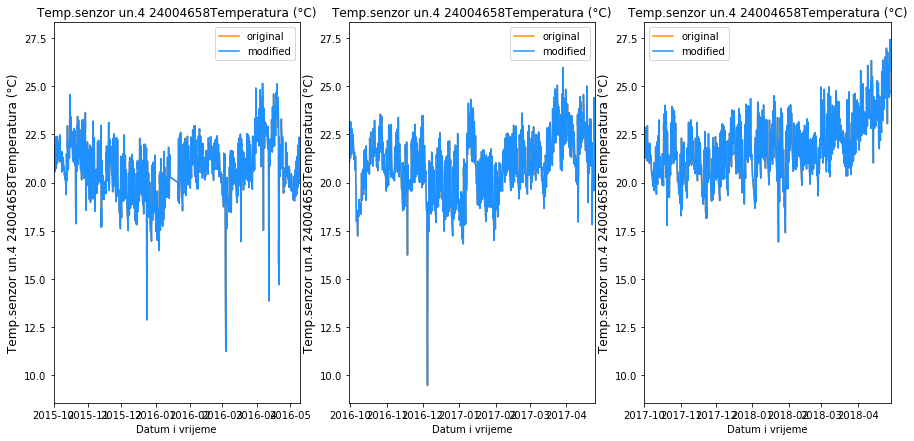

In [263]:
plot_missing_values(file,"Temp.senzor un.4 24004658Temperatura (°C)")

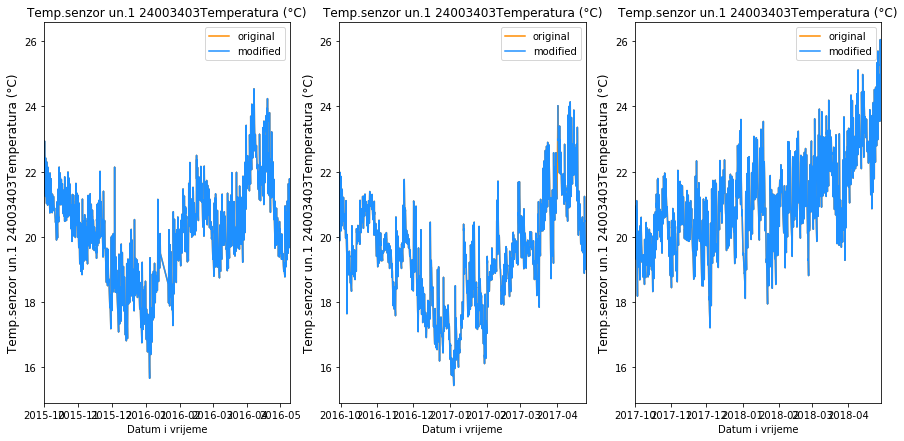

In [264]:
plot_missing_values(file,"Temp.senzor un.1 24003403Temperatura (°C)")

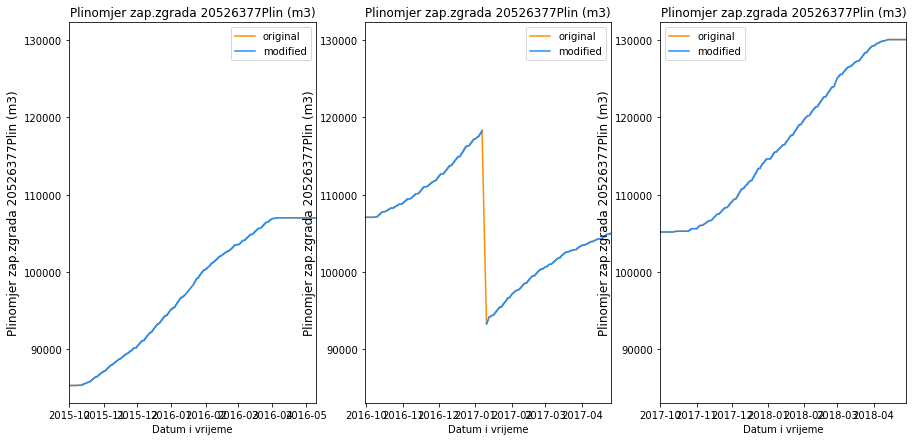

In [265]:
plot_missing_values(file,"Plinomjer zap.zgrada 20526377Plin (m3)")

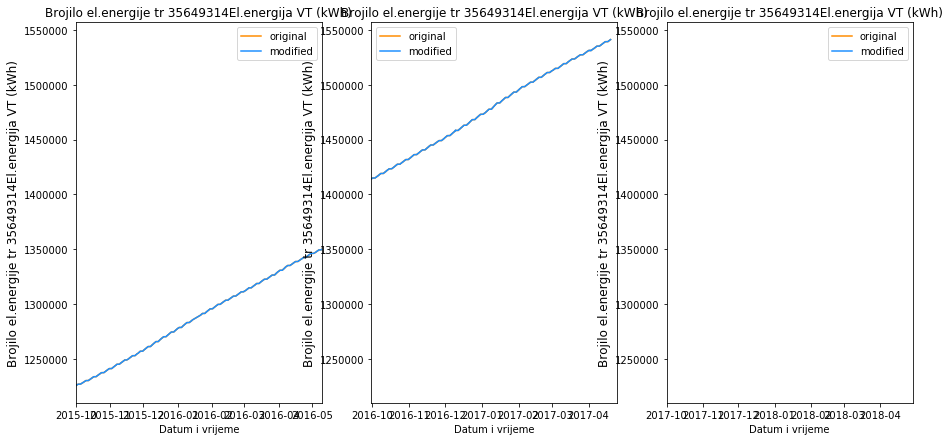

In [266]:
plot_missing_values(file,"Brojilo el.energije tr 35649314El.energija VT (kWh)")

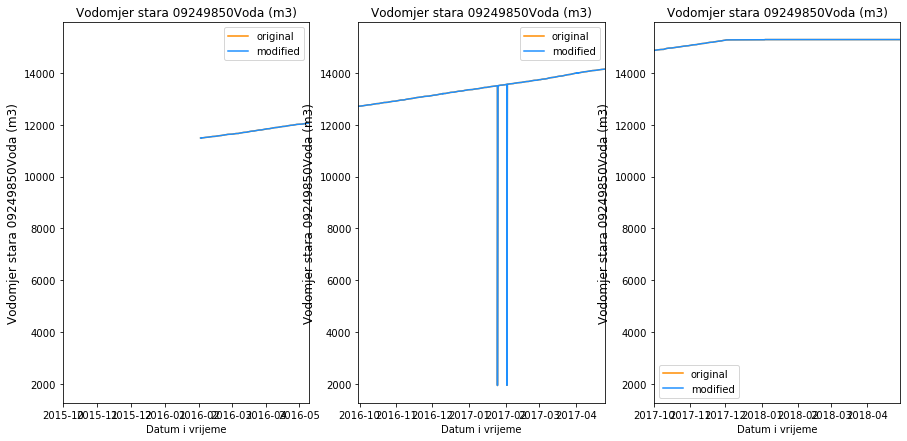

In [267]:
plot_missing_values(file,"Vodomjer stara 09249850Voda (m3)")

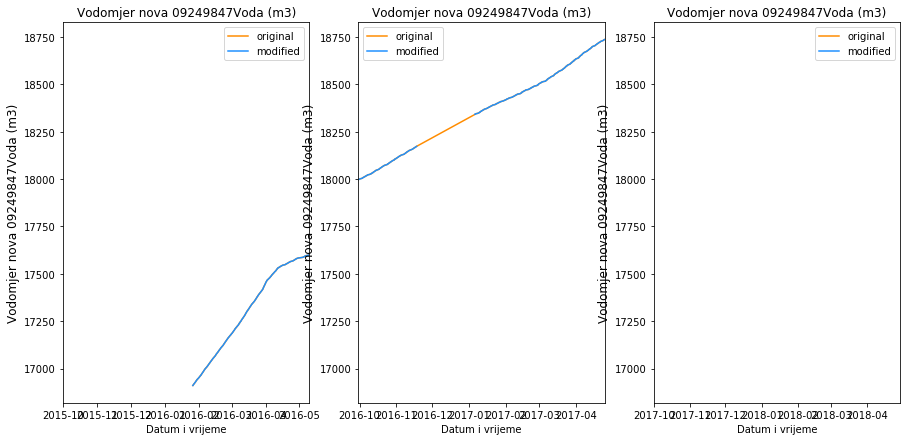

In [268]:
plot_missing_values(file,"Vodomjer nova 09249847Voda (m3)")

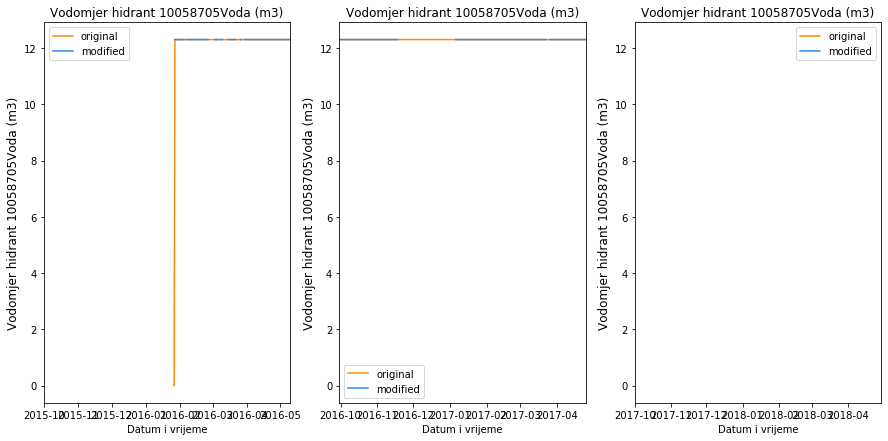

In [269]:
plot_missing_values(file,"Vodomjer hidrant 10058705Voda (m3)")

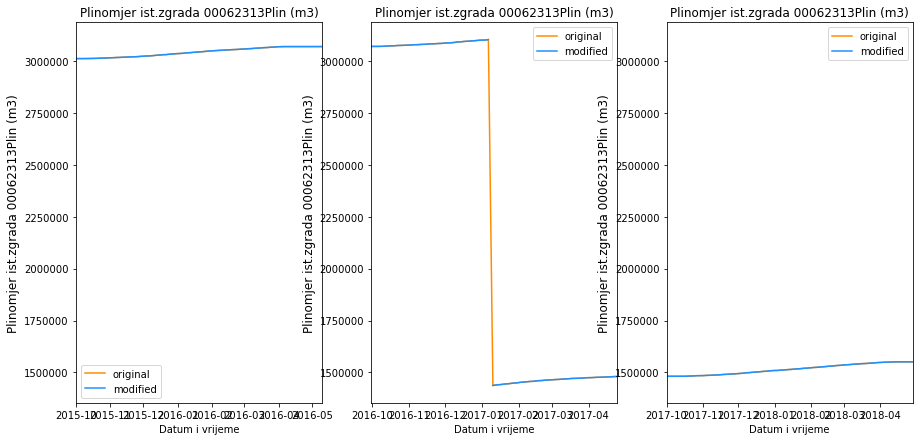

In [270]:
plot_missing_values(file,"Plinomjer ist.zgrada 00062313Plin (m3)")

In [271]:
file=file.drop(["Brojilo el.energije tr 35649314El.energija VT (kWh)","Brojilo el.energije tr 35649314El.energija MT (kWh)",
               "Vodomjer stara 09249850Voda (m3)","Vodomjer nova 09249847Voda (m3)","Vodomjer hidrant 10058705Voda (m3)"],axis=1)

In [272]:
file=file.sort_values(by=["Godina","Dan u godini","Sat"])

In [273]:
file.columns

Index(['Datum i vrijeme', 'Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Tren.protok (m3/h)',
       'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)',
       'Kalorimetar 2 39024724Kum.protok (m3)',
       'Kalorimetar 2 39024724Tren.protok (m3/h)',
       'Kalorimetar 3 39024787Topl.energija (MWh)',
       'Kalorimetar 3 39024787Kum.protok (m3)',
       'Kalorimetar 3 39024787Tren.protok (m3/h)',
       'Kalorimetar 3 39024787Temp.pol.voda (°C)',
       'Kalorimetar 3 39024787Temp.pov.voda (°C)',
       'Temp.senzor un.1 24003403Temperatura (°C)',
       'Temp.senzor un.1 24003403Vlažnost (%)',
       'Temp.senzor un.2 24004659Temperatura (°C)',
       'Temp.senzor un.2 24004659Vlažnost (%)',
   

In [274]:

t_room_set=20
file["Delta t_K1"]=(file['Kalorimetar 1 39024788Temp.pol.voda (°C)']+file['Kalorimetar 1 39024788Temp.pov.voda (°C)'])/2-t_room_set 
file["Delta t_K3"]=(file['Kalorimetar 3 39024787Temp.pol.voda (°C)']+file['Kalorimetar 3 39024787Temp.pov.voda (°C)'])/2-t_room_set   

In [275]:
file["Qrad_K1"]=152*(file["Delta t_K1"]/delta_t_nom)**1.33
file["Qrad_K3"]=152*(file["Delta t_K3"]/delta_t_nom)**1.33

In [276]:
file["Qrad_K1"].values[0]

nan

In [277]:
#file["Temp sr_K1"]=(file['Kalorimetar 1 39024788Temp.pol.voda (°C)']+file['Kalorimetar 1 39024788Temp.pov.voda (°C)'])/2
#file["Temp sr_K3"]=(file['Kalorimetar 3 39024787Temp.pol.voda (°C)']+file['Kalorimetar 3 39024787Temp.pol.voda (°C)'])/2

In [278]:
def heat(val):
    if np.isnan(val):
        return 0
    else: 
        return 1

In [279]:
file["Grijanje_K1"]=list(map(heat,file["Qrad_K1"].values))
file["Grijanje_K3"]=list(map(heat,file["Qrad_K3"].values))

In [280]:
aa=file.groupby(["Godina","Dan u godini"], axis=0)

In [281]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [282]:
file["Broj sati grijanja_K1"]=np.concatenate(values_tot)

In [283]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K3"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K3"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [284]:
file["Broj sati grijanja_K3"]=np.concatenate(values_tot)

In [285]:
values_xbefore=[]
values_xafter=[]
for name,group in aa:
    values_before=[None]*len(aa.get_group(name))
    values_after=[None]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values)
        if b.size==0:
            values_before=values_before
            values_after=values_after
        else:
            values_before[b[0][0]]=b[0][0]
            values_after[b[-1][0]]=24-b[-1][0]
        
    values_xbefore.append(values_before)
    values_xafter.append(values_after)

In [286]:
val_xbefore=np.concatenate(values_xbefore)
val_xafter=np.concatenate(values_xafter)

In [287]:
file["Negrijano_K1_prije"]=np.concatenate(values_xbefore)
file["Negrijano_K1_poslije"]=np.concatenate(values_xafter)

In [288]:
values_xbefore=[]
values_xafter=[]
for name,group in aa:
    values_before=[None]*len(aa.get_group(name))
    values_after=[None]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K3"].empty==False:
        
        b=np.argwhere(aa.get_group(name)["Grijanje_K3"].values)
        if b.size==0:
            values_before=values_before
            values_after=values_after
        else:
            values_before[b[0][0]]=b[0][0]
            values_after[b[-1][0]]=24-b[-1][0]
        
    values_xbefore.append(values_before)
    values_xafter.append(values_after)

In [289]:
val_xbefore=np.concatenate(values_xbefore)
val_xafter=np.concatenate(values_xafter)

In [290]:
file["Negrijano_K3_prije"]=np.concatenate(values_xbefore)
file["Negrijano_K3_poslije"]=np.concatenate(values_xafter)

In [291]:
bb=file.groupby(["Godina","Mjesec","Dan u mjesecu"], axis=0)

In [292]:
start_date_s1=file[file["Datum i vrijeme"]=='10/01/2015  00:00:00 AM'].index.values
end_date_s1=file[file["Datum i vrijeme"]=='05/09/2016  11:00:00 PM'].index.values
start_date_s2=file[file["Datum i vrijeme"]=='09/30/2016  00:00:00 AM'].index.values
end_date_s2=file[file["Datum i vrijeme"]=='04/25/2017  06:00:00 AM'].index.values
start_date_s3=file[file["Datum i vrijeme"]=='10/01/2017  00:00:00 AM'].index.values


In [293]:
S1=file.loc[start_date_s1[0]:end_date_s1[0]]
S2=file.loc[start_date_s2[0]:end_date_s2[0]]
S3=file.loc[start_date_s3[0]:]
print("Length of S1:", len(S1))
print("Length of S1:" ,len(S2))
print("Length of S1:" ,len(S3))

Length of S1: 5136
Length of S1: 4975
Length of S1: 5016


In [294]:
values_1=[None]*len(S1["Negrijano_K1_prije"].values)
values_1[0]=-2
num_before=np.argwhere(S1["Negrijano_K1_prije"].values)
num_after=np.argwhere(S1["Negrijano_K1_poslije"].values)
values_1[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_2=[None]*len(S2["Negrijano_K1_prije"].values)
values_2[0]=-2
num_before=np.argwhere(S2["Negrijano_K1_prije"].values)
num_after=np.argwhere(S2["Negrijano_K1_poslije"].values)
values_2[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_3=[None]*len(S3["Negrijano_K1_prije"].values)
values_3[0]=-2#pocetak sezone
num_before=np.argwhere(S3["Negrijano_K1_prije"].values)
num_after=np.argwhere(S3["Negrijano_K1_poslije"].values)
values_3[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

In [295]:
val_unheat=np.concatenate([values_1,values_2,values_3])

In [296]:
file["Negrijano_K1"]=np.empty(len(file["Negrijano_K1_prije"].values))
for val,k in list(enumerate(np.argwhere(file["Negrijano_K1_prije"].values))):
    file["Negrijano_K1"].values[[k][0]]=val_unheat[val]

In [297]:
values_1=[None]*len(S1["Negrijano_K3_prije"].values)
values_1[0]=-2
num_before=np.argwhere(S1["Negrijano_K3_prije"].values)
num_after=np.argwhere(S1["Negrijano_K3_poslije"].values)
values_1[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_2=[None]*len(S2["Negrijano_K3_prije"].values)
values_2[0]=-2
num_before=np.argwhere(S2["Negrijano_K3_prije"].values)
num_after=np.argwhere(S2["Negrijano_K3_poslije"].values)
values_2[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_3=[None]*len(S3["Negrijano_K3_prije"].values)
values_3[0]=-2#pocetak sezone
num_before=np.argwhere(S3["Negrijano_K3_prije"].values)
num_after=np.argwhere(S3["Negrijano_K3_poslije"].values)
values_3[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

In [298]:
val_unheat=np.concatenate([values_1,values_2,values_3])

In [299]:
file["Negrijano_K3"]=np.empty(len(file["Negrijano_K3_prije"].values))
for val,k in list(enumerate(np.argwhere(file["Negrijano_K3_prije"].values))):
    file["Negrijano_K3"].values[[k][0]]=val_unheat[val]

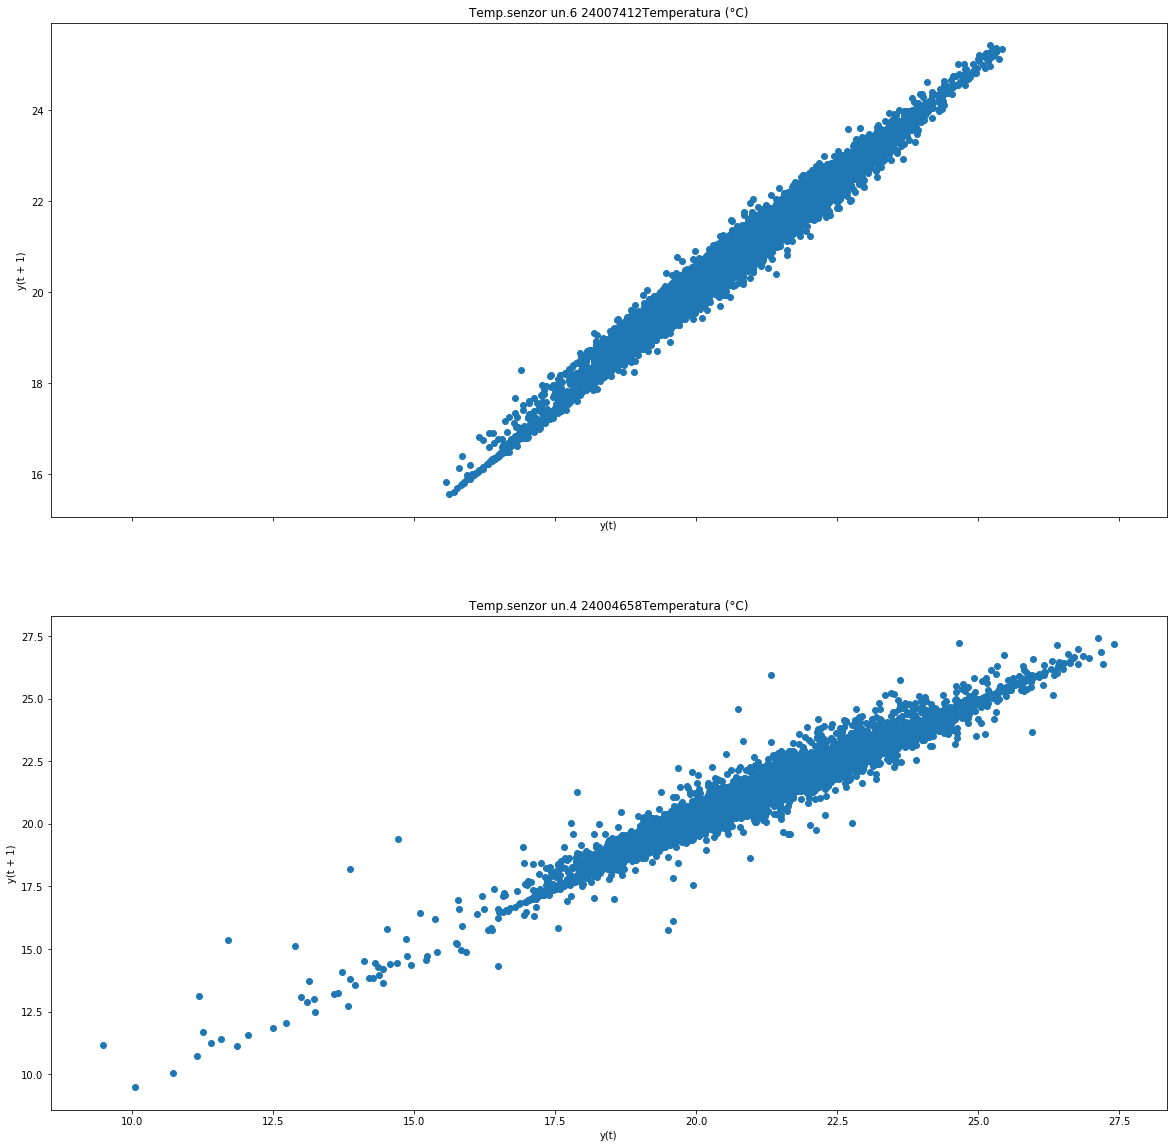

In [300]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
fig, ax = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(20,20))
series = ['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)']
for i,col in enumerate(series):
    
    lag_plot(file[col],ax=ax[i])
    ax[i].set_title(col)
pyplot.show()

In [301]:
indices_working=[]
for j in range (5):
    b=[list(file["Sat"].loc[(file["Sat"]==i)&(file["Dan u sedmici"]==j)].index) for i in range(9,18,1)]
    indices_working.append(b)

In [302]:
holiday=["2015-11-25","2015-12-25","2016-11-25","2016-17-25","2016-12-25","2017-12-25","2016-01-01",
        "2016-01-02","2017-01-01",
        "2017-01-02","2018-01-01",
        "2018-01-02","2016-01-07","2017-01-07","2018-01-07","2016-05-01","2016-05-02","2016-03-01","2017-03-01","2018-03-01"
        "2016-03-27","2016-04-30","2017-04-16","2018-04-01","2018-04-08"]

In [303]:
file["Radni sati"]=0
for j in range (5):
    b=[list(file["Sat"].loc[(file["Sat"]==i)&(file["Dan u sedmici"]==j)].index) for i in range(9,18,1)]
    for k in b:
        file["Radni sati"].values[k]=1

In [304]:
file["Praznik"]=0
indices_holiday=[]
for value in holiday:
    c=list((file["Datum i vrijeme"].loc[file["Datum i vrijeme"].dt.date.astype(str).str.contains(value)].index.values)) 
    for k in c:
        file["Praznik"].values[k]=1

In [305]:
file=file.drop(['Delta t_K1', 'Delta t_K3', 'Qrad_K1',
       'Qrad_K3'], axis=1)

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.
If we find that the predictor variables are correlated among themselves, we can drop the variable which has a lower correlation coefficient value with the target variable. We can also compute multiple correlation coefficients to check whether more than two variables are correlated to each other. This phenomenon is known as multicollinearity.

In [306]:
correlations=file.corr()

In [307]:
pd.set_option('display.max_rows', None)
print(correlations['Temp.senzor un.4 24004658Temperatura (°C)'].where(np.abs(correlations['Temp.senzor un.4 24004658Temperatura (°C)'])>=0.30))

Plinomjer ist.zgrada 00062313Plin (m3)                -0.337714
Brojilo el.energije su 35649294El.energija VT (kWh)    0.305407
Brojilo el.energije su 35649294El.energija MT (kWh)    0.394197
Kalorimetar 1 39024788Topl.energija (MWh)              0.407721
Kalorimetar 1 39024788Kum.protok (m3)                  0.421521
Kalorimetar 1 39024788Tren.protok (m3/h)                    NaN
Kalorimetar 1 39024788Temp.pol.voda (°C)                    NaN
Kalorimetar 1 39024788Temp.pov.voda (°C)               0.345457
Kalorimetar 2 39024724Kum.protok (m3)                  0.417436
Kalorimetar 2 39024724Tren.protok (m3/h)                    NaN
Kalorimetar 3 39024787Topl.energija (MWh)              0.408855
Kalorimetar 3 39024787Kum.protok (m3)                  0.396126
Kalorimetar 3 39024787Tren.protok (m3/h)                    NaN
Kalorimetar 3 39024787Temp.pol.voda (°C)               0.314312
Kalorimetar 3 39024787Temp.pov.voda (°C)               0.339626
Temp.senzor un.1 24003403Temperatura (°C

In [309]:
file2=file[correlations.columns[np.abs(correlations['Temp.senzor un.4 24004658Temperatura (°C)'])>=0.30]]
#file2=file2.drop(['Brojilo el.energije su 35649294El.energija MT (kWh)',
       #'Kalorimetar 1 39024788Topl.energija (MWh)','Kalorimetar 1 39024788Kum.protok (m3)','Kalorimetar 2 39024724Kum.protok (m3)',
       #'Kalorimetar 3 39024787Topl.energija (MWh)','Kalorimetar 3 39024787Kum.protok (m3)',
      # 'Temp.senzor un.1 24003403Temperatura (°C)','Temp.senzor un.2 24004659Temperatura (°C)',
      # 'Temp.senzor un.3 24003393Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)','Temp.senzor un.5 24007590Temperatura (°C)',
       #'Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.7 24007548Temperatura (°C)',
      # 'Temp.senzor un.8 24007403Temperatura (°C)','Temp.senzor vanj.1 25000099Temperatura (°C)'],axis=1)

In [310]:
file2.columns

Index(['Plinomjer ist.zgrada 00062313Plin (m3)',
       'Brojilo el.energije su 35649294El.energija VT (kWh)',
       'Brojilo el.energije su 35649294El.energija MT (kWh)',
       'Kalorimetar 1 39024788Topl.energija (MWh)',
       'Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)',
       'Kalorimetar 2 39024724Kum.protok (m3)',
       'Kalorimetar 3 39024787Topl.energija (MWh)',
       'Kalorimetar 3 39024787Kum.protok (m3)',
       'Kalorimetar 3 39024787Temp.pol.voda (°C)',
       'Kalorimetar 3 39024787Temp.pov.voda (°C)',
       'Temp.senzor un.1 24003403Temperatura (°C)',
       'Temp.senzor un.2 24004659Temperatura (°C)',
       'Temp.senzor un.3 24003393Temperatura (°C)',
       'Temp.senzor un.4 24004658Temperatura (°C)',
       'Temp.senzor un.5 24007590Temperatura (°C)',
       'Temp.senzor un.6 24007412Temperatura (°C)',
       'Temp.senzor un.7 24007548Temperatura (°C)',
       'Temp.senzor un.8 24007403Temperatura (°C)',
       'Te

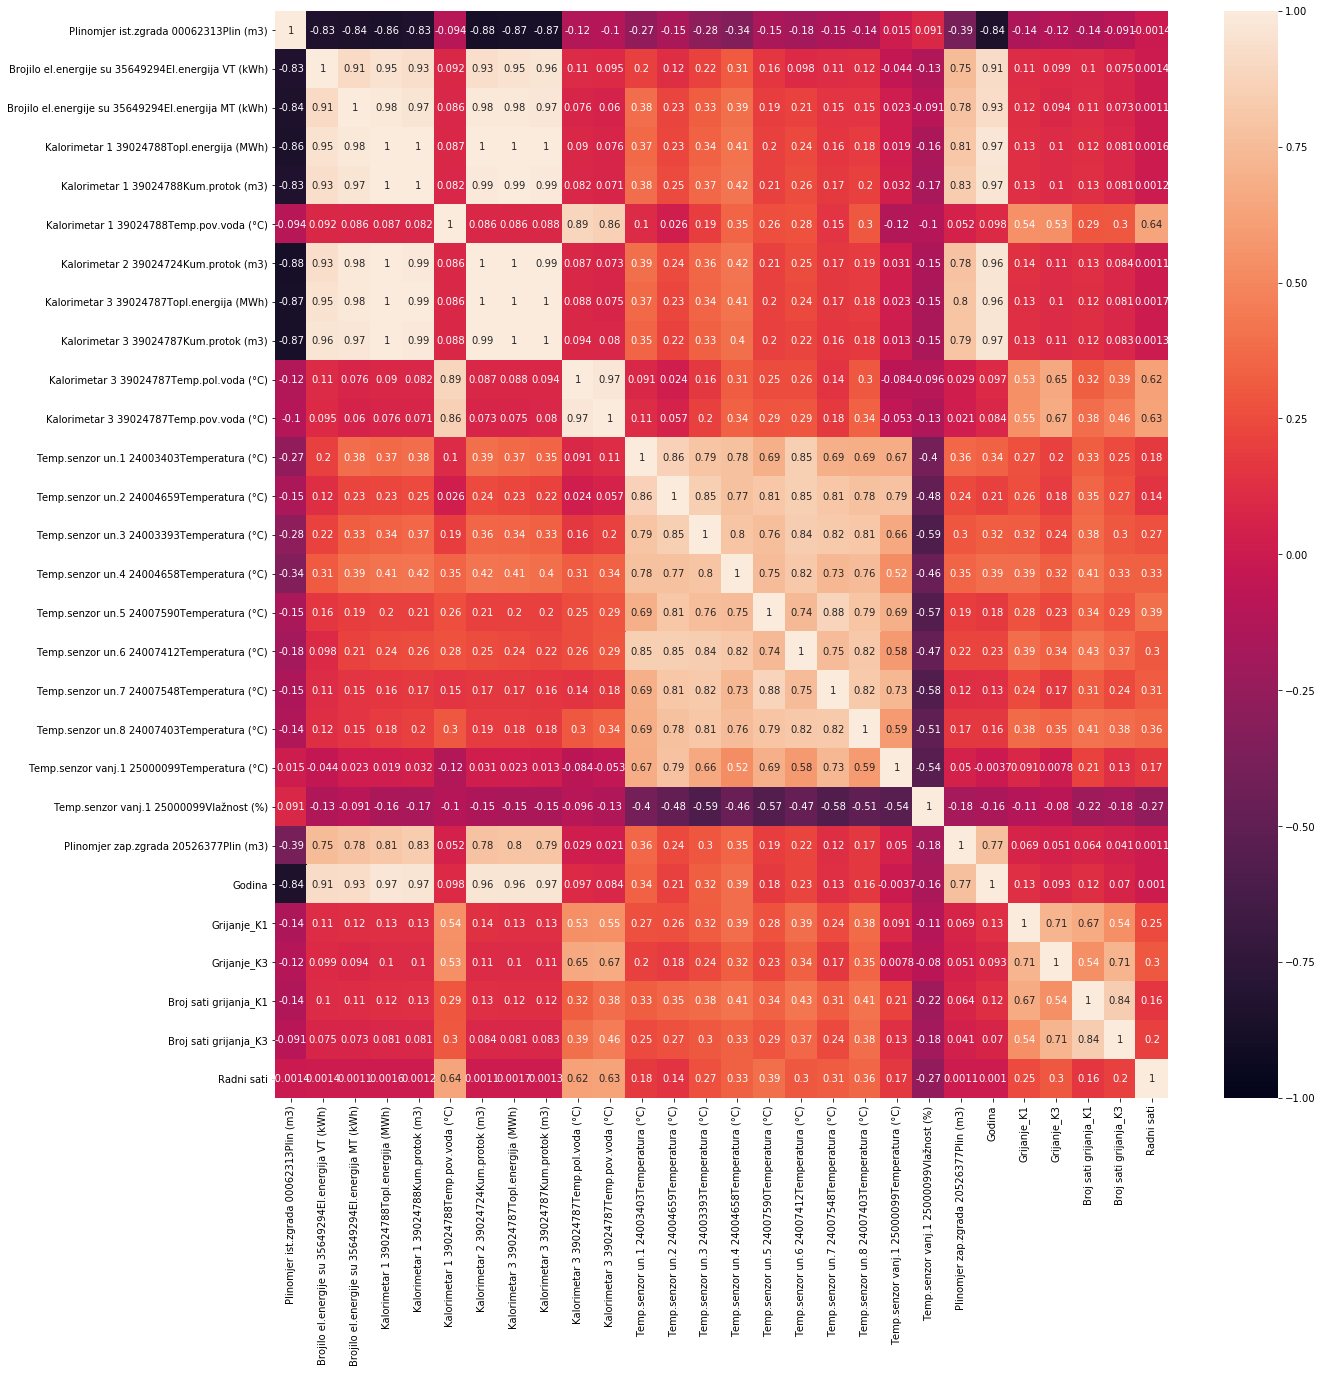

In [311]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.heatmap(file2.corr(),annot=True, vmin=-1, vmax=1)
plt.show()

In [314]:
file3=file2[['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)','Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)']]#'Plinomjer ist.zgrada 00062313Plin (m3)'
series=['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)','Kalorimetar 1 39024788Kum.protok (m3)',
       'Kalorimetar 1 39024788Temp.pov.voda (°C)']#'Plinomjer ist.zgrada 00062313Plin (m3)'

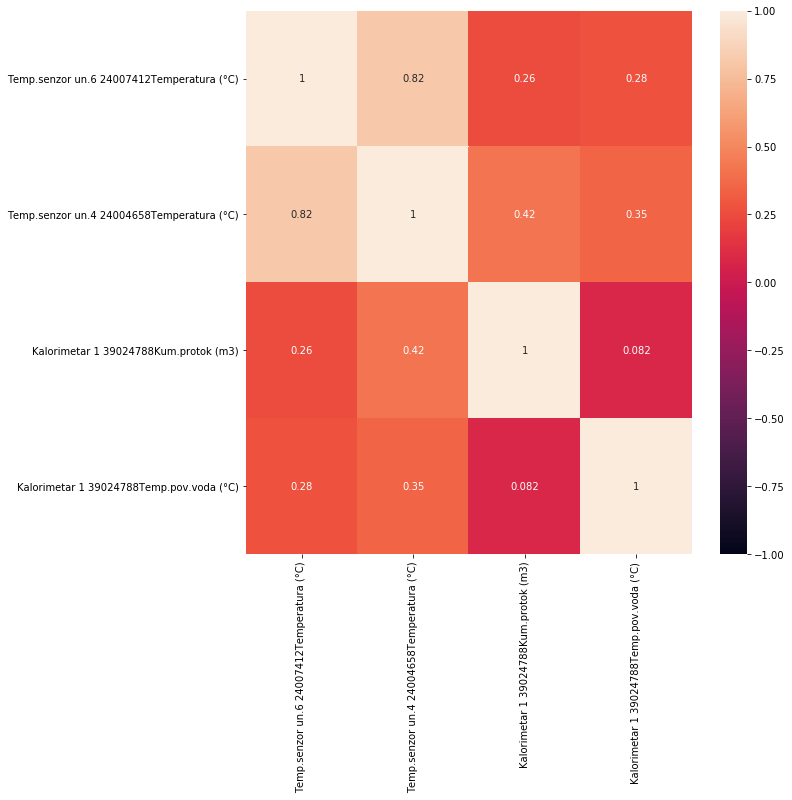

In [315]:
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(file3.corr(),annot=True, vmin=-1, vmax=1)
plt.show()

In [316]:
for col in ['Temp.senzor un.6 24007412Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)']:
    t1=S1[col].shift(1)
    t2=S2[col].shift(1)
    t3=S3[col].shift(1)
    t_prior=np.concatenate([t1,t2,t3])
    file[col+" (t-1)"]=t_prior

In [317]:
file.head(2)

,Datum i vrijeme,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Kalorimetar 1 39024788Topl.energija (MWh),Kalorimetar 1 39024788Kum.protok (m3),Kalorimetar 1 39024788Tren.protok (m3/h),Kalorimetar 1 39024788Temp.pol.voda (°C),Kalorimetar 1 39024788Temp.pov.voda (°C),Kalorimetar 2 39024724Kum.protok (m3),...,Negrijano_K1_prije,Negrijano_K1_poslije,Negrijano_K3_prije,Negrijano_K3_poslije,Negrijano_K1,Negrijano_K3,Radni sati,Praznik,Temp.senzor un.6 24007412Temperatura (°C) (t-1),Temp.senzor un.4 24004658Temperatura (°C) (t-1)
0,2015-10-01 00:00:00,3009985.0,371651.16,230421.12,1349.61,322693.0,0.0,18.3,19.5,674383.0,...,None,None,None,None,9.084280e-312,9.081949e-312,0,0,NaN,NaN
1,2015-10-01 01:00:00,3009985.0,371651.16,230427.44,1349.61,322693.0,0.0,18.3,19.4,674383.0,...,None,None,None,None,9.084271e-312,9.084271e-312,0,0,21.74,21.11


In [325]:
file["T4_24_mean"],file["T6_24_mean"]=file['Temp.senzor un.4 24004658Temperatura (°C)'].expanding(24).mean(),file['Temp.senzor un.6 24007412Temperatura (°C)'].expanding(24).mean()
file["T4_24_max"],file["T6_24_max"]=file['Temp.senzor un.4 24004658Temperatura (°C)'].expanding(24).max(),file['Temp.senzor un.6 24007412Temperatura (°C)'].expanding(24).max()
file["T4_24_min"],file["T6_24_min"]=file['Temp.senzor un.4 24004658Temperatura (°C)'].expanding(24).min(),file['Temp.senzor un.6 24007412Temperatura (°C)'].expanding(24).min()

In [326]:
#from pandas.plotting import autocorrelation_plot
#f, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 20))
#for i,column in enumerate(series):
 #   autocorrelation_plot(file3[column])
#plt.show()


In [327]:
#from statsmodels.tsa.stattools import adfuller
#for column in series:
 #   result = adfuller(filex[column].values)
  #  print(column,":", result)

In [328]:
    #from statsmodels.graphics.tsaplots import plot_acf
    #from statsmodels.graphics.tsaplots import plot_pacf

   # f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
   # for i,column in enumerate(series):
        #plot_acf(filex["Kalorimetar 1 39024788Temp.pol.voda (°C)"], lags=24, ax=ax[0])
        #plot_pacf(filex["Kalorimetar 1 39024788Temp.pol.voda (°C)"], lags=24, ax=ax[1])

   # plt.show()

In [329]:
file.to_excel("Merged files_1.xlsx", index=False)#manually modified and saved as Merged files_2)

In [248]:
#create shift features

In [ ]:
nan_values = df[df['first_set'].isna()]

print (nan_values)
